In [1]:
import matplotlib.pyplot as plt
import numpy as np
import nbimporter
import util

from linear_model import LinearModel
from p01b_logreg import LogisticRegression
from p01ef_gda import GDA, plot

In [2]:
ds1_training_set_path = '../data/ds1_train.csv'
ds1_valid_set_path = '../data/ds1_valid.csv'
ds2_training_set_path = '../data/ds2_train.csv'
ds2_valid_set_path = '../data/ds2_valid.csv'

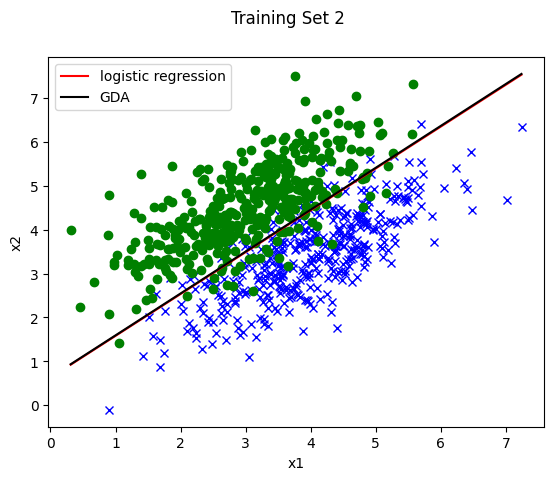

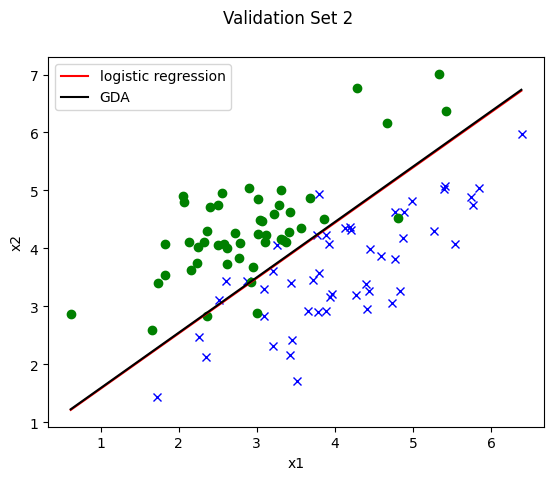

In [3]:
# Train logistic regression
x_train, y_train = util.load_dataset(ds2_training_set_path, add_intercept=True)
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

# Train GDA
x_train, y_train = util.load_dataset(ds2_training_set_path)
gda = GDA()
gda.fit(x_train, y_train)

# Plot decision boundaries on training set 2
plot(x_train, y_train, theta_1=log_reg.theta, legend_1='logistic regression', 
                       theta_2=gda.theta, legend_2='GDA', title='Training Set 2')

# Plot decision boundaries on validation set 2
x_valid, y_valid = util.load_dataset(ds2_valid_set_path)
plot(x_valid, y_valid, theta_1=log_reg.theta, legend_1='logistic regression', 
                       theta_2=gda.theta, legend_2='GDA', title='Validation Set 2')

For dataset 2, logistic regression and GDA have same performance.

As a result, GDA performs poorly on dataset 1 but OK on dataset 2. The reason is that GDA assumes $p(x \vert y)$ is Gaussian, whereas dataset 1 is non-Gaussian.

Take a look at dataset 1, we find that all the $x_2$'s are non-negative. Take the logarithm of $x_2$ and train the classifiers:

In [4]:
x_train, y_train = util.load_dataset(ds1_training_set_path)
x_valid, y_valid = util.load_dataset(ds1_valid_set_path)

# Select all the 1st column's elements x_1, select and convert all the 2nd column's 
#  elements x_2, and combine them in the perspective of columns.
trans_x_train = np.stack((x_train[:, 0], np.log(x_train[:, 1])), axis=1)
trans_x_valid = np.stack((x_valid[:, 0], np.log(x_valid[:, 1])), axis=1)

In [5]:
# Train logistic regression
transformed_x_train_with_intercept = util.add_intercept(transformed_x_train)
log_reg = LogisticRegression()
log_reg.fit(transformed_x_train_with_intercept, y_train)

# Train GDA
gda = GDA()
gda.fit(transformed_x_train, y_train)

# Plot decision boundaries on training set 1
plot(transformed_x_train, y_train, theta_1=log_reg.theta, legend_1='logistic regression', 
            theta_2=gda.theta, legend_2='GDA', title='Transformed Training Set 1')

# Plot decision boundaries on validation set 1
plot(trans_x_valid, y_valid, theta_1=log_reg.theta, legend_1='logistic regression', 
            theta_2=gda.theta, legend_2='GDA', title='Transformed Validation Set 1')

NameError: name 'transformed_x_train' is not defined

Now they nearly share the same performance.